In [227]:
import pandas as pd 
import datetime
raw_data =pd.read_csv(r"C:\Users\jsru2\Desktop\SRE class assignment\acs2017_census_tract_data.csv\acs2017_census_tract_data.csv")

In [228]:
acs_df = raw_data[["TractId", "State", "County","TotalPop", "Poverty", "IncomePerCap"]]
acs_df.head()

,TractId,State,County,TotalPop,Poverty,IncomePerCap
0,1001020100,Alabama,Autauga County,1845,10.7,33018.0
1,1001020200,Alabama,Autauga County,2172,22.4,18996.0
2,1001020300,Alabama,Autauga County,3385,14.7,21236.0
3,1001020400,Alabama,Autauga County,4267,2.3,28068.0
4,1001020500,Alabama,Autauga County,9965,12.2,36905.0


In [229]:
acs_df['poverty_pop'] = (acs_df['TotalPop']*acs_df['Poverty'])/100
acs_df['tot_income'] = acs_df['TotalPop']*acs_df['IncomePerCap']
acs_df.head(4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TractId,State,County,TotalPop,Poverty,IncomePerCap,poverty_pop,tot_income
0,1001020100,Alabama,Autauga County,1845,10.7,33018.0,197.415,60918210.0
1,1001020200,Alabama,Autauga County,2172,22.4,18996.0,486.528,41259312.0
2,1001020300,Alabama,Autauga County,3385,14.7,21236.0,497.595,71883860.0
3,1001020400,Alabama,Autauga County,4267,2.3,28068.0,98.141,119766156.0


In [230]:
acs_df.drop(columns=['Poverty','IncomePerCap','TractId' ],inplace=True)
acs_df.head(4)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,State,County,TotalPop,poverty_pop,tot_income
0,Alabama,Autauga County,1845,197.415,60918210.0
1,Alabama,Autauga County,2172,486.528,41259312.0
2,Alabama,Autauga County,3385,497.595,71883860.0
3,Alabama,Autauga County,4267,98.141,119766156.0


In [231]:
acs_grp_df = acs_df.groupby(['State','County']).sum()
acs_grp_df.head()

TotalPop  poverty_pop    tot_income
State   County                                             
Alabama Autauga County     55036     7570.912  1.531317e+09
        Baldwin County    203360    24138.132  5.971537e+09
        Barbour County     26201     7039.682  4.601180e+08
        Bibb County        22580     3368.040  4.721744e+08
        Blount County      57667     8998.906  1.269869e+09

In [232]:
acs_grp_df['Poverty']= (acs_grp_df['poverty_pop']/acs_grp_df['TotalPop'])*100
acs_grp_df['IncomePerCap']= acs_grp_df['tot_income']/acs_grp_df['TotalPop']
acs_grp_df.drop(columns=['poverty_pop','tot_income'],inplace=True)

acs_grp_df.head(4)

TotalPop    Poverty  IncomePerCap
State   County                                           
Alabama Autauga County     55036  13.756290  27823.920161
        Baldwin County    203360  11.869656  29364.365583
        Barbour County     26201  26.867990  17561.086981
        Bibb County        22580  14.916032  20911.176616

In [233]:
result = acs_grp_df.loc[[('Oregon', 'Washington County'),('Virginia','Loudoun County'),('Kentucky','Harlan County'),('Oregon','Malheur County')]]
result

,,TotalPop,Poverty,IncomePerCap
State,County,,,
Oregon,Washington County,572071,10.321202,35369.047499
Virginia,Loudoun County,374558,3.689598,50455.645745
Kentucky,Harlan County,27548,35.669482,15456.971032
Oregon,Malheur County,30421,24.298225,17567.504323


In [235]:
covid_data =pd.read_csv(r"C:\Users\jsru2\Desktop\SRE class assignment\COVID_county_data.csv\COVID_county_data.csv")


In [236]:
covid_data['date']= pd.to_datetime(covid_data['date'])
covid_data['county']=covid_data['county']+' County'
covid_data.dtypes
covid_data.head(4)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish County,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish County,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish County,Washington,53061.0,1,0.0
3,2020-01-24,Cook County,Illinois,17031.0,1,0.0


In [237]:
# TotalCases - total number of COVID cases for this county as of February 20, 2021
# TotalDeaths - total number of COVID deaths for this county as of February 20, 2021
#Find the sum from between start data and February 20, 2021
covid_tot_data=covid_data.groupby(['state','county']).max()
covid_tot_data=covid_tot_data.drop(columns=['fips'])
covid_tot_data.rename(columns={"cases": "tot_cases", "deaths": "tot_deaths"},inplace=True)
covid_tot_data.head()


date  tot_cases  tot_deaths
state   county                                          
Alabama Autauga County 2021-02-20       6092        85.0
        Baldwin County 2021-02-20      19392       262.0
        Barbour County 2021-02-20       2067        50.0
        Bibb County    2021-02-20       2414        58.0
        Blount County  2021-02-20       6040       125.0

In [238]:
# Dec2020Deaths - number of COVID deaths recorded in this county in December of 2020
# Dec2020Cases - number of COVID cases recorded in this county in December of 2020
covid_dec_data=covid_data[(covid_data['date'] > '2020-11-30') & (covid_data['date'] < '2021-01-01')]
covid_dec_data=covid_dec_data.groupby(['state','county']).max()
covid_dec_data=covid_dec_data.drop(columns=['fips'])
covid_dec_data.rename(columns={"cases": "dec_cases", "deaths": "dec_deaths"},inplace=True)
covid_dec_data.head(4)

date  dec_cases  dec_deaths
state   county                                          
Alabama Autauga County 2020-12-31       4190        48.0
        Baldwin County 2020-12-31      13601       161.0
        Barbour County 2020-12-31       1514        32.0
        Bibb County    2020-12-31       1834        46.0

In [241]:
covid_final_data = covid_dec_data.merge(covid_tot_data,left_index=True, right_index=True)
covid_final_data.index.rename(['State', 'County'], inplace =True)
covid_final_data.head()

date_x  dec_cases  dec_deaths     date_y  \
State   County                                                        
Alabama Autauga County 2020-12-31       4190        48.0 2021-02-20   
        Baldwin County 2020-12-31      13601       161.0 2021-02-20   
        Barbour County 2020-12-31       1514        32.0 2021-02-20   
        Bibb County    2020-12-31       1834        46.0 2021-02-20   
        Blount County  2020-12-31       4641        63.0 2021-02-20   

                        tot_cases  tot_deaths  
State   County                                 
Alabama Autauga County       6092        85.0  
        Baldwin County      19392       262.0  
        Barbour County       2067        50.0  
        Bibb County          2414        58.0  
        Blount County        6040       125.0

In [242]:
covid_result = covid_final_data.loc[[('Oregon', 'Washington County'),('Virginia','Loudoun County'),('Kentucky','Harlan County'),('Oregon','Malheur County')]]
covid_result

,,date_x,dec_cases,dec_deaths,date_y,tot_cases,tot_deaths
State,County,,,,,,
Oregon,Washington County,2020-12-31,16070,142.0,2021-02-20,20866,209.0
Virginia,Loudoun County,2020-12-31,14169,159.0,2021-02-20,22557,199.0
Kentucky,Harlan County,2020-12-31,1538,18.0,2021-02-20,2352,68.0
Oregon,Malheur County,2020-12-31,2914,50.0,2021-02-20,3331,58.0


In [201]:
final_data = covid_result.merge(result,left_index=True, right_index=True)
final_data

,,date_x,dec_cases,dec_deaths,date_y,tot_cases,tot_deaths,TotalPop,Poverty,IncomePerCap
State,County,,,,,,,,,
Oregon,Washington County,2020-12-31,16070,142.0,2021-02-20,20866,209.0,572071,10.321202,35369.047499
Virginia,Loudoun County,2020-12-31,14169,159.0,2021-02-20,22557,199.0,374558,3.689598,50455.645745
Kentucky,Harlan County,2020-12-31,1538,18.0,2021-02-20,2352,68.0,27548,35.669482,15456.971032
Oregon,Malheur County,2020-12-31,2914,50.0,2021-02-20,3331,58.0,30421,24.298225,17567.504323


In [217]:
country_result= covid_final_data.merge(acs_grp_df,left_index=True, right_index=True)
country_result['totCasesPer100k']=(country_result['tot_cases']*100000)/country_result['TotalPop']
country_result['totDeathsPer100k']=(country_result['tot_deaths']*100000)/country_result['TotalPop']
country_result['decCasesPer100k']=(country_result['dec_cases']*100000)/country_result['TotalPop']
country_result['decDeathsPer100k']=(country_result['dec_deaths']*100000)/country_result['TotalPop']
country_result


date_x  dec_cases  dec_deaths     date_y  \
State   County                                                           
Alabama Autauga County    2020-12-31       4190        48.0 2021-02-20   
        Baldwin County    2020-12-31      13601       161.0 2021-02-20   
        Barbour County    2020-12-31       1514        32.0 2021-02-20   
        Bibb County       2020-12-31       1834        46.0 2021-02-20   
        Blount County     2020-12-31       4641        63.0 2021-02-20   
...                              ...        ...         ...        ...   
Wyoming Sweetwater County 2020-12-31       2966        16.0 2021-02-20   
        Teton County      2020-12-31       2138         4.0 2021-02-20   
        Uinta County      2020-12-31       1558         7.0 2021-02-20   
        Washakie County   2020-12-31        780        19.0 2021-02-20   
        Weston County     2020-12-31        476         2.0 2021-02-20   

                           tot_cases  tot_deaths  TotalPop    Poverty  \
State   County                                                          
Alabama Autauga County          6092        85.0     55036  13.756290   
        Baldwin County         19392       262.0    203360  11.869656   
        Barbour County          2067        50.0     26201  26.867990   
        Bibb County             2414        58.0     22580  14.916032   
        Blount County           6040       125.0     57667  15.604949   
...                              ...         ...       ...        ...   
Wyoming Sweetwater County       3645        34.0     44527  12.079610   
        Teton County            3318         9.0     22923   6.842756   
        Uinta County            2024        12.0     20758  14.821438   
        Washakie County          876        26.0      8253  12.866873   
        Weston County            619         5.0      7117  14.309639   

                           IncomePerCap  totCasesPer100k  totDeathsPer100k  \
State   County                                                               
Alabama Autauga County     27823.920161     11069.118395        154.444364   
        Baldwin County     29364.365583      9535.798584        128.835563   
        Barbour County     17561.086981      7889.011870        190.832411   
        Bibb County        20911.176616     10690.876882        256.864482   
        Blount County      22020.719562     10473.927896        216.761753   
...                                 ...              ...               ...   
Wyoming Sweetwater County  31699.951737      8186.044422         76.358165   
        Teton County       49200.625311     14474.545217         39.261877   
        Uinta County       27114.842808      9750.457655         57.809037   
        Washakie County    27344.988853     10614.322065        315.036956   
        Weston County      30954.891246      8697.484895         70.254321   

                           decCasesPer100k  decDeathsPer100k  
State   County                                                
Alabama Autauga County         7613.198634         87.215641  
        Baldwin County         6688.139260         79.169945  
        Barbour County         5778.405404        122.132743  
        Bibb County            8122.232064        203.720106  
        Blount County          8047.930359        109.247923  
...                                    ...               ...  
Wyoming Sweetwater County      6661.126957         35.933254  
        Teton County           9326.876936         17.449723  
        Uinta County           7505.540033         33.721939  
        Washakie County        9451.108688        230.219314  
        Weston County          6688.211325         28.101728  

[3002 rows x 13 columns]

In [244]:
oregon_result = country_result.loc[[('Oregon')]]
oregon_result.head(4)


date_x  dec_cases  dec_deaths     date_y  \
State  County                                                          
Oregon Baker County     2020-12-31        472         5.0 2021-02-20   
       Benton County    2020-12-31       1347        11.0 2021-02-20   
       Clackamas County 2020-12-31      10058       114.0 2021-02-20   
       Clatsop County   2020-12-31        553         3.0 2021-02-20   

                         tot_cases  tot_deaths  TotalPop    Poverty  \
State  County                                                         
Oregon Baker County            629         7.0     15980  15.083855   
       Benton County          2248        16.0     88249  22.421152   
       Clackamas County      13196       172.0    399962   8.976120   
       Clatsop County          766         6.0     38021  12.190090   

                         IncomePerCap  totCasesPer100k  totDeathsPer100k  \
State  County                                                              
Oregon Baker County      25820.273154      3936.170213         43.804756   
       Benton County     30872.824361      2547.337647         18.130517   
       Clackamas County  37550.849108      3299.313435         43.004085   
       Clatsop County    28114.625523      2014.676100         15.780753   

                         decCasesPer100k  decDeathsPer100k  
State  County                                               
Oregon Baker County          2953.692115         31.289111  
       Benton County         1526.362905         12.464730  
       Clackamas County      2514.738900         28.502708  
       Clatsop County        1454.459378          7.890376

In [245]:
# COVID total cases vs. % population in poverty
print(oregon_result['totCasesPer100k'].corr(oregon_result['Poverty']))
# COVID total deaths vs. % population in poverty
print(oregon_result['totDeathsPer100k'].corr(oregon_result['Poverty']))
# COVID total cases vs. Per Capita Income level
print(oregon_result['totCasesPer100k'].corr(oregon_result['IncomePerCap']))
# COVID total deaths vs. Per Capita Income level
print(oregon_result['totDeathsPer100k'].corr(oregon_result['IncomePerCap']))
# COVID cases during December 2020 vs. % population in poverty
print(oregon_result['decCasesPer100k'].corr(oregon_result['Poverty']))
# COVID deaths during December 2020 vs. % population in poverty
print(oregon_result['decDeathsPer100k'].corr(oregon_result['Poverty']))
# COVID cases during December 2020 vs. Per Capita Income level
print(oregon_result['decCasesPer100k'].corr(oregon_result['IncomePerCap']))
# COVID cases during December 2020 vs. Per Capita Income level
print(oregon_result['decCasesPer100k'].corr(oregon_result['IncomePerCap']))


0.31806336246419203
0.36387526180001856
-0.41300604347954034
-0.5367952720335063
0.29487677050379707
0.38604737818347395
-0.38717063280245867
-0.38717063280245867


In [246]:
#Across all of the counties in the entire USA

# COVID total cases vs. % population in poverty
print(country_result['totCasesPer100k'].corr(country_result['Poverty']))
# COVID total deaths vs. % population in poverty
print(country_result['totDeathsPer100k'].corr(country_result['Poverty']))
# COVID total cases vs. Per Capita Income level
print(country_result['totCasesPer100k'].corr(country_result['IncomePerCap']))
# COVID total deaths vs. Per Capita Income level
print(country_result['totDeathsPer100k'].corr(country_result['IncomePerCap']))
# COVID cases during December 2020 vs. % population in poverty
print(country_result['decCasesPer100k'].corr(country_result['Poverty']))
# COVID deaths during December 2020 vs. % population in poverty
print(country_result['decDeathsPer100k'].corr(country_result['Poverty']))
# COVID cases during December 2020 vs. Per Capita Income level
print(country_result['decCasesPer100k'].corr(country_result['IncomePerCap']))
# COVID cases during December 2020 vs. Per Capita Income level
print(country_result['decCasesPer100k'].corr(country_result['IncomePerCap']))


0.1280074916825624
0.22670239808714923
-0.21209843702504072
-0.25186712152583435
0.0724852534999747
0.17970146156874178
-0.16790759951927262
-0.16790759951927262


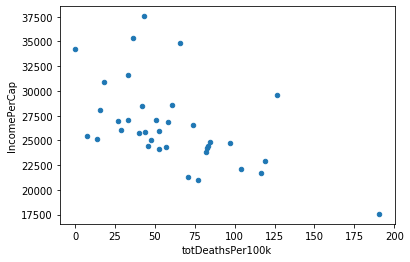

In [247]:
oregon_result.plot.scatter('totDeathsPer100k', 'IncomePerCap')